# TASK #1: IMPORT LIBRARIES AND DATASETS

In [1]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir

  Using cached setuptools-75.2.0-py3-none-any.whl.metadata (6.9 kB)
Using cached setuptools-75.2.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 72.1.0
    Uninstalling setuptools-72.1.0:
      Successfully uninstalled setuptools-72.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
dash 2.17.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.17.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.17.1 requires dash-table==5.0.0, which is not installed.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.4.2 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.4.2 which is incompatible.
aut

In [4]:
# pip install autogluon autogluon.tabular "mxnet<2.0.0"

In [5]:
# AutoGluon is modularized into sub-modules for: 1. Tabular, 2. text, 3.Images
from autogluon.tabular import TabularDataset, TabularPredictor

In [6]:
insurance_df = pd.read_csv('insurance.csv')

In [7]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500



- **How many unique regions do we have in the insurance_df DataFrame?**

In [8]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# TASK #2: PERFORM EXPLORATORY DATA ANALYSIS 

In [9]:
# Explore the first five rows in the DataFrame
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
# Explore the last five rows in the DataFrame
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [11]:
# Generate statistical summary
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Obtain dataset information
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# Grouping by region to see any relationship between region and charges
# Seems like south east region has the highest charges and body mass index
df_region = insurance_df.groupby(by='region').mean(numeric_only=True)
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [17]:
df_age = insurance_df.groupby(by = 'age').mean(numeric_only=True)
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


# TASK #3: PERFORM DATA VISUALIZATION

<Axes: >

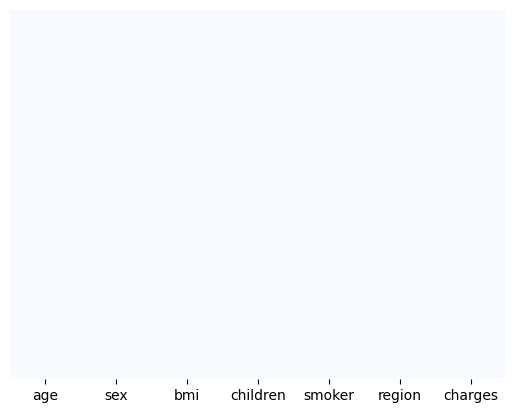

In [18]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [19]:
# check if there are any Null values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

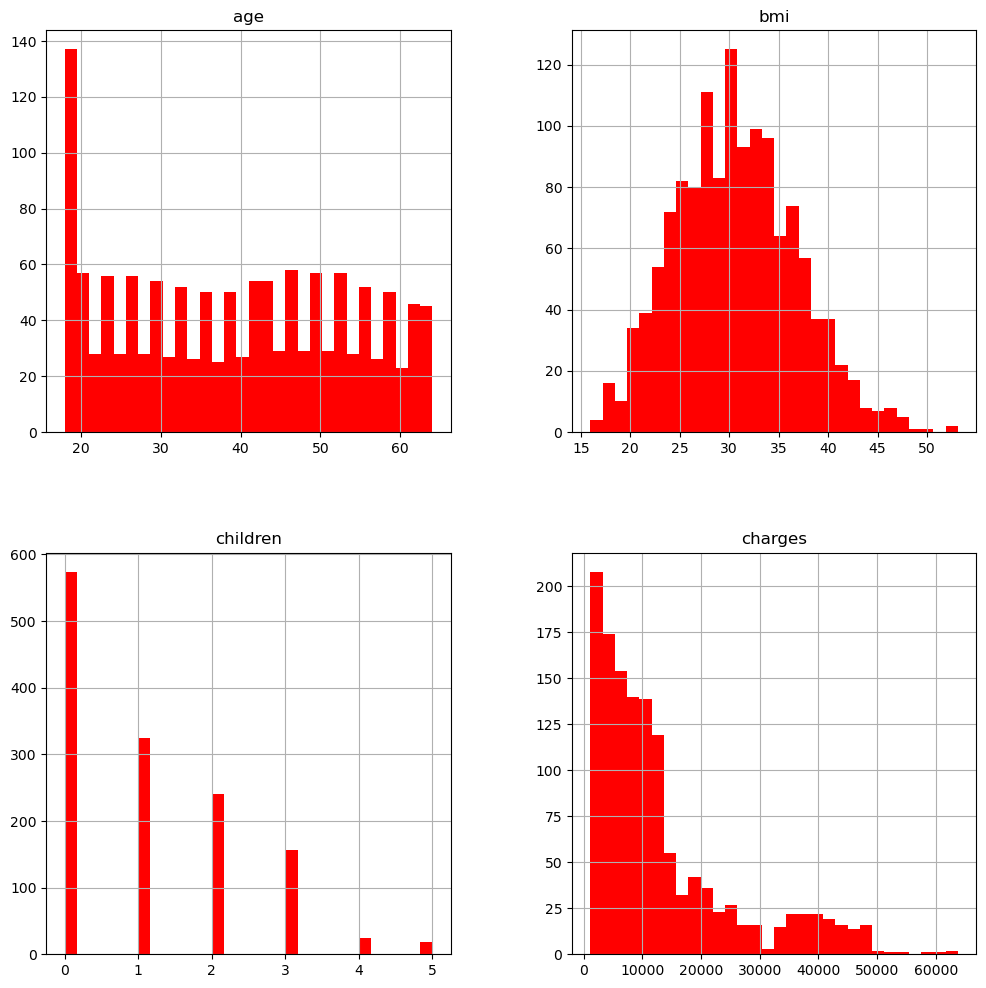

In [20]:
insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'charges']].hist(bins = 30, figsize = (12, 12), color = 'r');


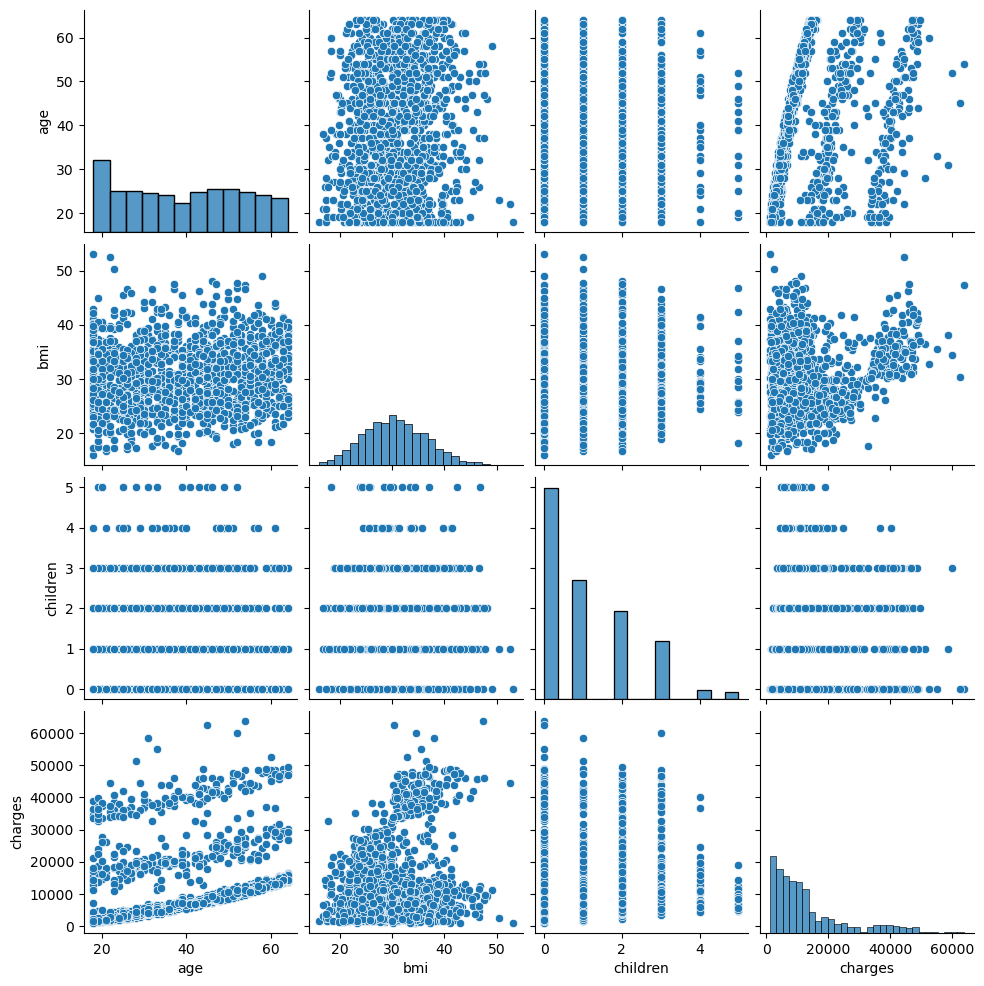

In [21]:
# plot pairplot
sns.pairplot(insurance_df)

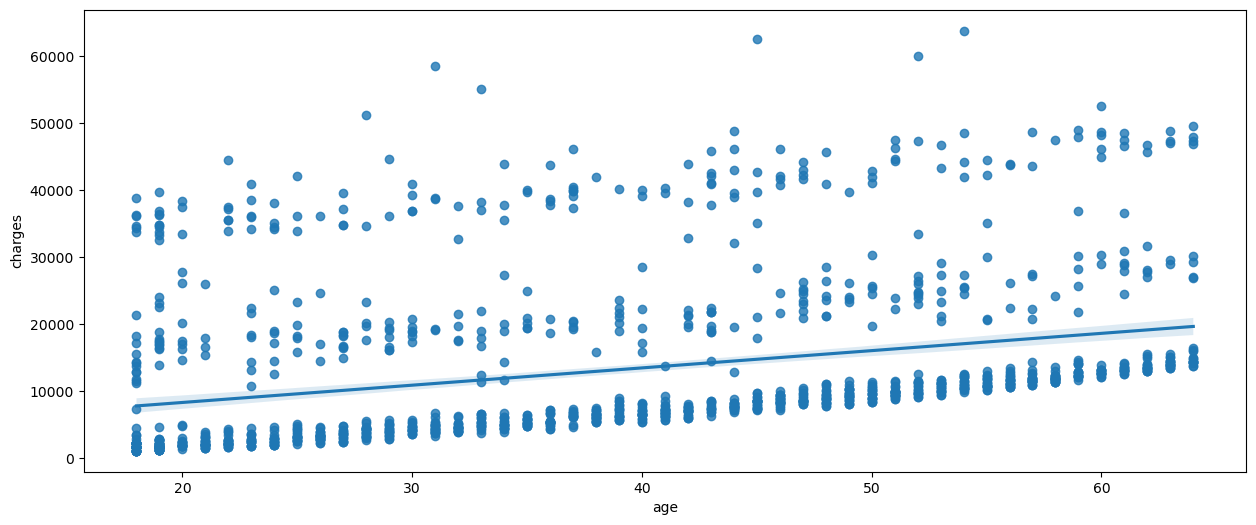

In [22]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()
  

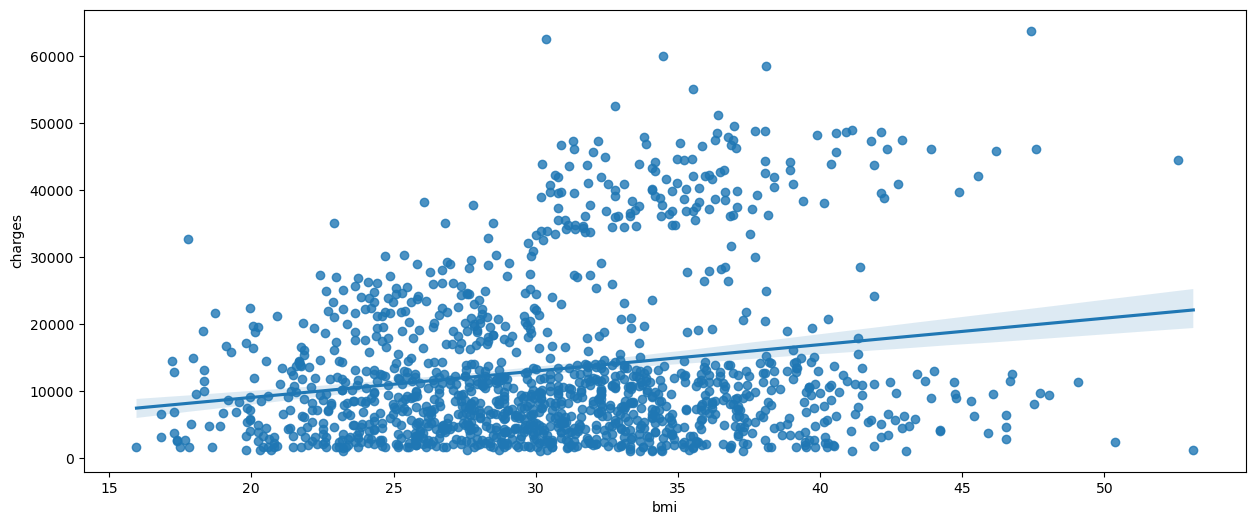

In [25]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()
  

 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

In [29]:
insurance_df.corr(numeric_only=True)

,age,sex,bmi,children,charges
age,1.000000,-0.020856,0.109272,0.042469,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.067998
charges,0.299008,0.057292,0.198341,0.067998,1.000000


<Axes: >

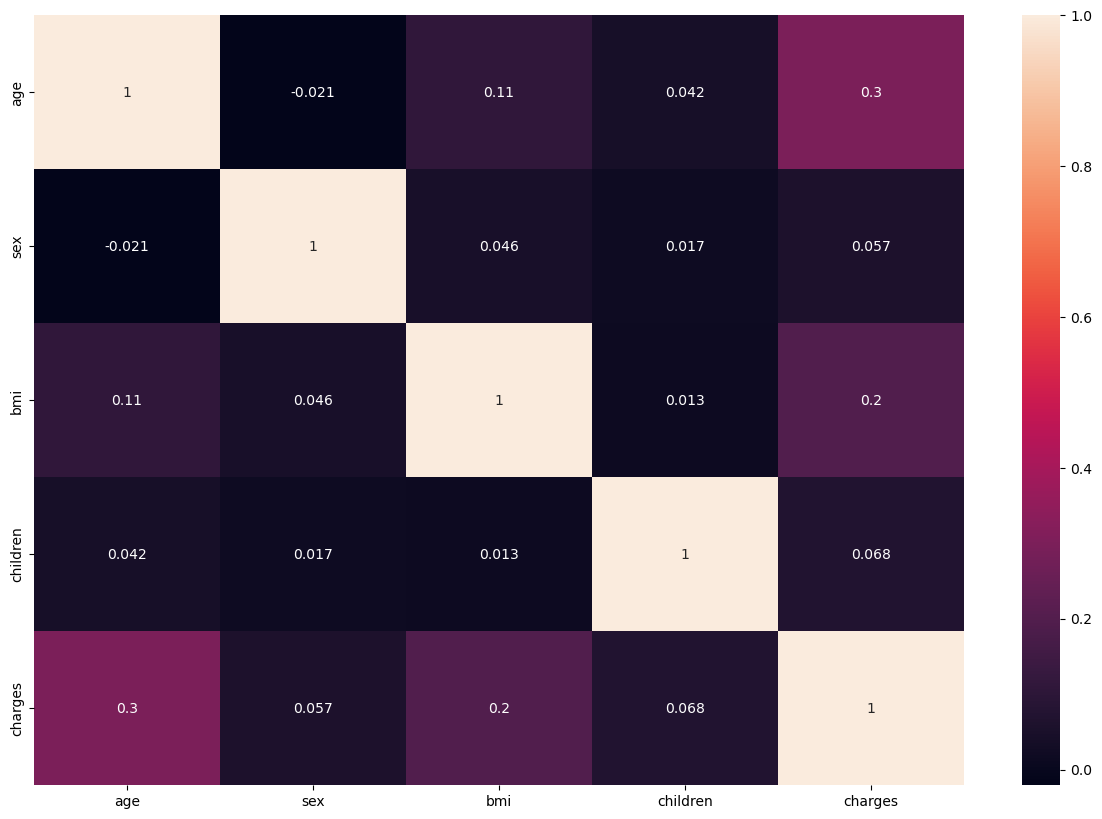

In [31]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(numeric_only=True), annot = True)

# TASK #4: TRAIN MULTIPLE MODELS USING AUTOGLUON

In [32]:
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(insurance_df, test_size=0.2, random_state=0)

In [33]:
X_train

,age,sex,bmi,children,smoker,region,charges
621,37,1,34.100,4,yes,southwest,40182.24600
194,18,1,34.430,0,no,southeast,1137.46970
240,23,0,36.670,2,yes,northeast,38511.62830
1168,32,1,35.200,2,no,southwest,4670.64000
1192,58,0,32.395,1,no,northeast,13019.16105
...,...,...,...,...,...,...,...
763,27,1,26.030,0,no,northeast,3070.80870
835,42,1,35.970,2,no,southeast,7160.33030
1216,40,1,25.080,0,no,southeast,5415.66120
559,19,1,35.530,0,no,northwest,1646.42970


In [34]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,1,30.200,1,no,southwest,9724.53000
610,47,0,29.370,1,no,southeast,8547.69130
569,48,1,40.565,2,yes,northwest,45702.02235
1034,61,1,38.380,0,no,northwest,12950.07120
198,51,0,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,0,30.495,2,no,northwest,15019.76005
726,41,1,28.405,1,no,northwest,6664.68595
1132,57,1,40.280,0,no,northeast,20709.02034
725,30,0,39.050,3,yes,southeast,40932.42950


In [35]:
# Train multiple ML regression models using AutoGluon
# You need to specify the target column, train_data, limit_time, and presets 
# Note that AutoGluon automatically detects if the problem is classification or regression type problems from the 'label' column
# For regression type problems, 'label' values are generally floating point non-integers with large number of unique values

predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'r2').fit(train_data = X_train, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20241024_191643"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Oct 8 16:18:15 UTC 2024
CPU Count:          2
Memory Avail:       1.86 GB / 3.76 GB (49.5%)
Disk Space Avail:   4.58 GB / 4.99 GB (91.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to ident

In [36]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3   0.848397          r2       1.390659  96.111504                0.001339           0.149686            3       True         10
1     WeightedEnsemble_L2   0.847426          r2       0.335023  62.501149                0.001293           0.165942            2       True          8
2         CatBoost_BAG_L1   0.846672          r2       0.032057  23.802699                0.032057          23.802699            1       True          6
3       LightGBMXT_BAG_L2   0.844069          r2       1.389320  95.961818                0.137905          32.347687            2       True          9
4       LightGBMXT_BAG_L1   0.840820          r2       0.045594  19.015576                0.045594          19.015576            1       True          3
5         LightGBM_B

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -0.07448567993942246,
  'KNeighborsDist_BAG_L1': -0.16102308298670942,
  'LightGBMXT_BAG_L1': 0.8408198040276409,
  'LightGBM_BAG_L1': 0.8396145120831351,
  'RandomForestMSE_BAG_L1': 0.8227276280725969,
  'CatBoost_BAG_L1': 0.8466715382588097,
  'ExtraTreesMSE_BAG_L1': 0.8218176959677763,
  'WeightedEnsemble_L2': 0.8474262976144116,
  'LightGBMXT_BAG_L2': 0.8440694561204546,
  'WeightedEnsemble_L3': 0.84839735

# TASK #5: EVALUATE TRAINED MODELS PERFORMANCE

In [37]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.848397,r2,1.390659,96.111504,0.001339,0.149686,3,True,10
1,WeightedEnsemble_L2,0.847426,r2,0.335023,62.501149,0.001293,0.165942,2,True,8
2,CatBoost_BAG_L1,0.846672,r2,0.032057,23.802699,0.032057,23.802699,1,True,6
3,LightGBMXT_BAG_L2,0.844069,r2,1.389320,95.961818,0.137905,32.347687,2,True,9
4,LightGBMXT_BAG_L1,0.840820,r2,0.045594,19.015576,0.045594,19.015576,1,True,3
5,LightGBM_BAG_L1,0.839615,r2,0.038869,18.131508,0.038869,18.131508,1,True,4
6,RandomForestMSE_BAG_L1,0.822728,r2,0.217212,1.385426,0.217212,1.385426,1,True,5
7,ExtraTreesMSE_BAG_L1,0.821818,r2,0.301234,1.263380,0.301234,1.263380,1,True,7
8,KNeighborsUnif_BAG_L1,-0.074486,r2,0.014493,0.005361,0.014493,0.005361,1,True,1
9,KNeighborsDist_BAG_L1,-0.161023,r2,0.601959,0.010183,0.601959,0.010183,1,True,2


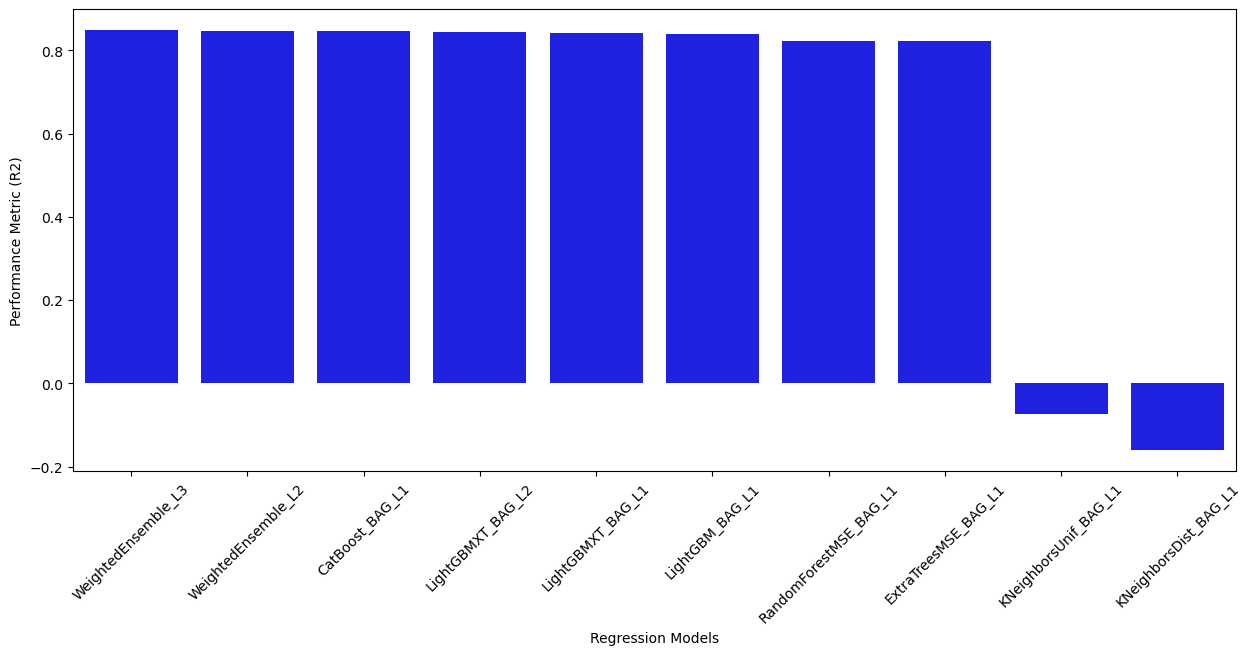

In [38]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);


In [39]:
predictor.evaluate(X_test)

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


{'r2': 0.9036188863553727,
 'root_mean_squared_error': -3916.263906178189,
 'mean_squared_error': -15337122.982834047,
 'mean_absolute_error': -2406.0124038847366,
 'pearsonr': 0.951459158087066,
 'median_absolute_error': -1621.084457421875}

In [40]:
# assess model performance
# Pick 5 test datasets and generate predictions
y_pred = predictor.predict(X_test)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [11521.44140625, 10336.845703125, 45162.609375, 13769.0859375, 10891.79296875]


In [41]:
X_test

,age,sex,bmi,children,smoker,region,charges
578,52,1,30.200,1,no,southwest,9724.53000
610,47,0,29.370,1,no,southeast,8547.69130
569,48,1,40.565,2,yes,northwest,45702.02235
1034,61,1,38.380,0,no,northwest,12950.07120
198,51,0,18.050,0,no,northwest,9644.25250
...,...,...,...,...,...,...,...
1084,62,0,30.495,2,no,northwest,15019.76005
726,41,1,28.405,1,no,northwest,6664.68595
1132,57,1,40.280,0,no,northeast,20709.02034
725,30,0,39.050,3,yes,southeast,40932.42950


In [42]:
y_test = X_test['charges']
y_test #groundtruth

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

Text(0.5, 0, 'True Values')

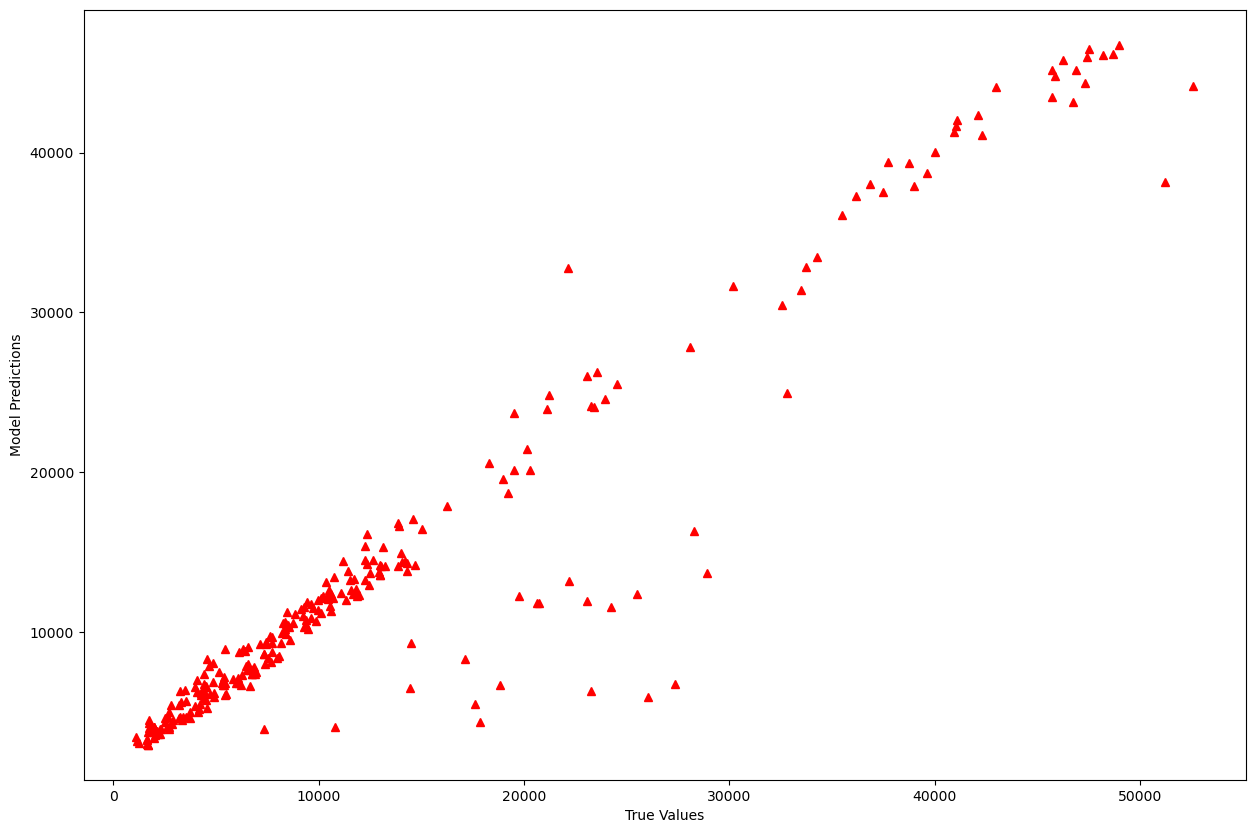

In [43]:
y_predict = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_test, y_predict, "^", color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')


In [51]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from math import sqrt

MAPE = mape_value = mean_absolute_percentage_error(y_test, y_predict)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('MAPE =',MAPE, '\nRMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

MAPE = 0.31857063833754157 
RMSE = 3916.264 
MSE = 15337122.982834047 
MAE = 2406.0124038847366 
R2 = 0.9036188863553727 
Adjusted R2 = 0.9010240102187865


- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

 - **How many unique regions do we have in the insurance_df?**

In [45]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

- **Group data by 'age' and examine the relationship between 'age' and 'charges'**

In [47]:
df_age = insurance_df.groupby(by = 'age').mean(numeric_only=True)
df_age

,sex,bmi,children,charges
age,,,,
18,0.521739,31.326159,0.449275,7086.217556
19,0.514706,28.596912,0.426471,9747.909335
20,0.517241,30.632759,0.862069,10159.697736
21,0.535714,28.185714,0.785714,4730.464330
22,0.535714,31.087679,0.714286,10012.932802
23,0.500000,31.454464,1.000000,12419.820040
24,0.500000,29.142679,0.464286,10648.015962
25,0.535714,29.693929,1.285714,9838.365311
26,0.535714,29.428929,1.071429,6133.825309


 - **Calculate and plot the correlation matrix**
 - **Which feature has the most positive correlation with charges?**

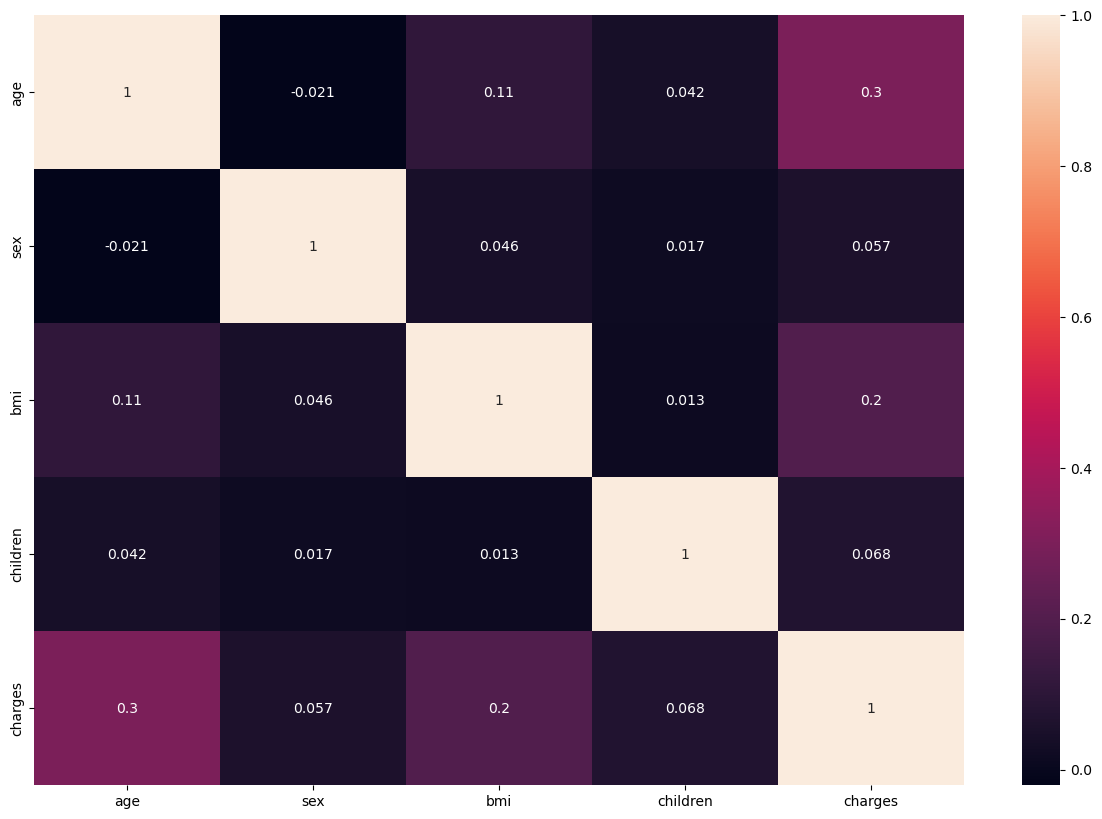

In [49]:
plt.figure(figsize = (15, 10))
sns.heatmap(insurance_df.corr(numeric_only=True), annot = True);
# smoker and age have positive correlations with charges

- **Retrain a regressor model using AutoGluon with different preset value**
- **Set the limit_time to 300 secs**
- **Use RMSE as the key metric and plot the barchart**
- **Which model provides the best performance?**
- **Assess trained model performance by comparing various metrics**

No path specified. Models will be saved in: "AutogluonModels/ag-20241024_193546"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Oct 8 16:18:15 UTC 2024
CPU Count:          2
Memory Avail:       1.47 GB / 3.76 GB (39.1%)
Disk Space Avail:   4.51 GB / 4.99 GB (90.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['optimize_for_deployment']
Beginning AutoGluon training ... Time limit = 300s
AutoGluon will save models to "AutogluonModels/ag-20241024_193546"
Train Data Rows:    1070
Train Data Columns: 6
Label Column:       charges
Problem Type:       regression
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1504.01 MB
	Train Data (Original)  Memory 

*** Summary of fit() ***
Estimated performance of each model:
                 model    score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -4591.575150  root_mean_squared_error       0.100069  19.583849                0.000525           0.026371            2       True          5
1             CatBoost -4606.663123  root_mean_squared_error       0.003457   1.229746                0.003457           1.229746            1       True          2
2       NeuralNetTorch -4714.256104  root_mean_squared_error       0.032549  15.000162                0.032549          15.000162            1       True          4
3             LightGBM -4763.082342  root_mean_squared_error       0.007478   0.861375                0.007478           0.861375            1       True          1
4      NeuralNetFastAI -4783.725238  root_mean_squared_error       0.056060   2.466196                0.056060   

{'root_mean_squared_error': -3937.561251092701,
 'mean_squared_error': -15504388.606106715,
 'mean_absolute_error': -2304.261589944671,
 'r2': 0.9025677604653655,
 'pearsonr': 0.9503544465965944,
 'median_absolute_error': -1394.76665859375}

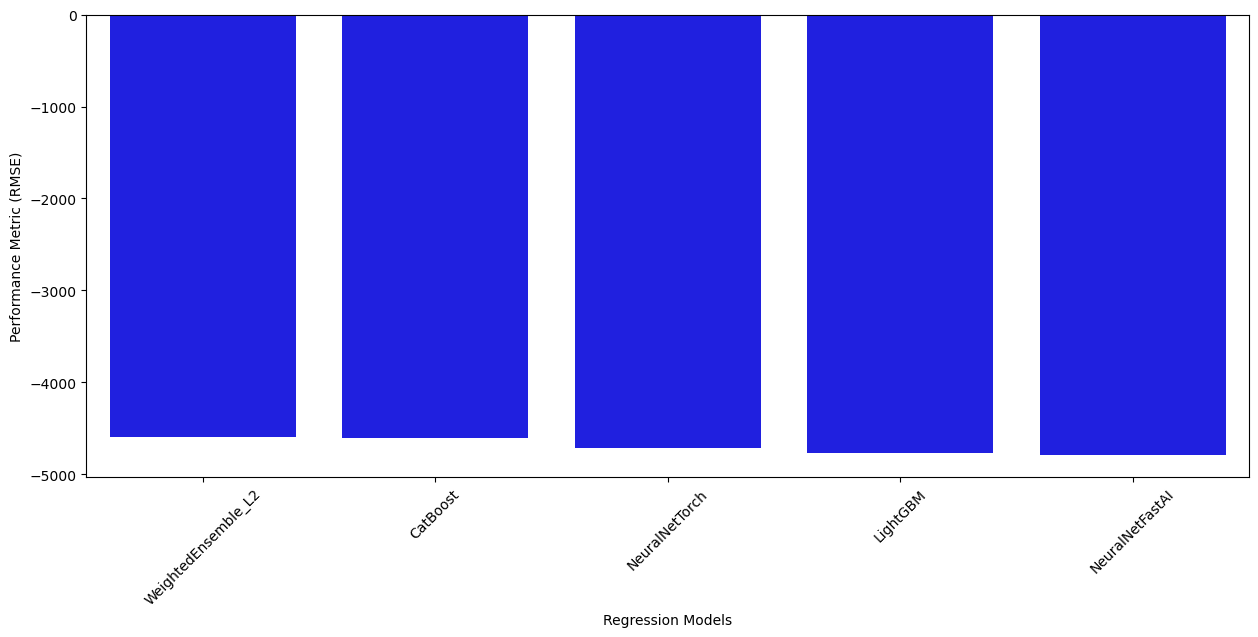

In [50]:
predictor = TabularPredictor(label="charges", problem_type = 'regression', eval_metric = 'rmse').fit(train_data = X_train, time_limit = 300, presets = "optimize_for_deployment")
predictor.fit_summary()
predictor.leaderboard()

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (RMSE)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

predictor.evaluate(X_test)